<h2 style="text-align: center;"><b>Дифференцирование и анализ данных
</b></h2>


# Данный датасет представляет данные по потреблению алкоголя в России за 1988-2016гг. Он содержит данные по потреблению следующих крепких напитков: вина, пива, водки, бренди и шампанского.

In [ ]:
# загрузим и установим нужные библиотеки
!pip install missingno

import missingno as msno

In [ ]:
# загрузим данные
data = pd.read_csv("C:/Users/siraevagm/Desktop/russia_alcohol.csv", na_values = ['na',], encoding='latin1')
data

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


In [ ]:
# выведем информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [ ]:
# посмотрим описательную статистику по числовым признакам датасета
data.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


Рассмотрим, какие регионы у нас присутствуют в датасете:

In [ ]:
# создадим список с наименованием регионов России для анализа
region_list=[]
regions=[region_list.append(x_region) for x_region in data['region'] if x_region not in region_list]
region_list

['Republic of Adygea',
 'Altai Krai',
 'Amur Oblast',
 'Arkhangelsk Oblast',
 'Astrakhan Oblast',
 'Republic of Bashkortostan',
 'Belgorod Oblast',
 'Bryansk Oblast',
 'Republic of Buryatia',
 'Vladimir Oblast',
 'Volgograd Oblast',
 'Vologda Oblast',
 'Voronezh Oblast',
 'Republic of Dagestan',
 'Jewish Autonomous Oblast',
 'Zabaykalsky Krai',
 'Ivanovo Oblast',
 'Republic of Ingushetia',
 'Irkutsk Oblast',
 'Kabardino-Balkar Republic',
 'Kaliningrad Oblast',
 'Republic of Kalmykia',
 'Kaluga Oblast',
 'Kamchatka Krai',
 'Karachay-Cherkess Republic',
 'Republic of Karelia',
 'Kemerovo Oblast',
 'Kirov Oblast',
 'Kostroma Oblast',
 'Krasnodar Krai',
 'Krasnoyarsk Krai',
 'Republic of Crimea',
 'Kurgan Oblast',
 'Kursk Oblast',
 'Leningrad Oblast',
 'Lipetsk Oblast',
 'Magadan Oblast',
 'Mari El Republic',
 'Republic of Mordovia',
 'Moscow',
 'Moscow Oblast',
 'Murmansk Oblast',
 'Nenets Autonomous Okrug',
 'Nizhny Novgorod Oblast',
 'Novgorod Oblast',
 'Novosibirsk Oblast',
 'Omsk Obla

In [ ]:
# определим столбец year как дату
data["year"].astype(np.int64)

0       1998
1       1998
2       1998
3       1998
4       1998
        ... 
1610    2016
1611    2016
1612    2016
1613    2016
1614    2016
Name: year, Length: 1615, dtype: int64

Определимся с присутствием NaN значений:

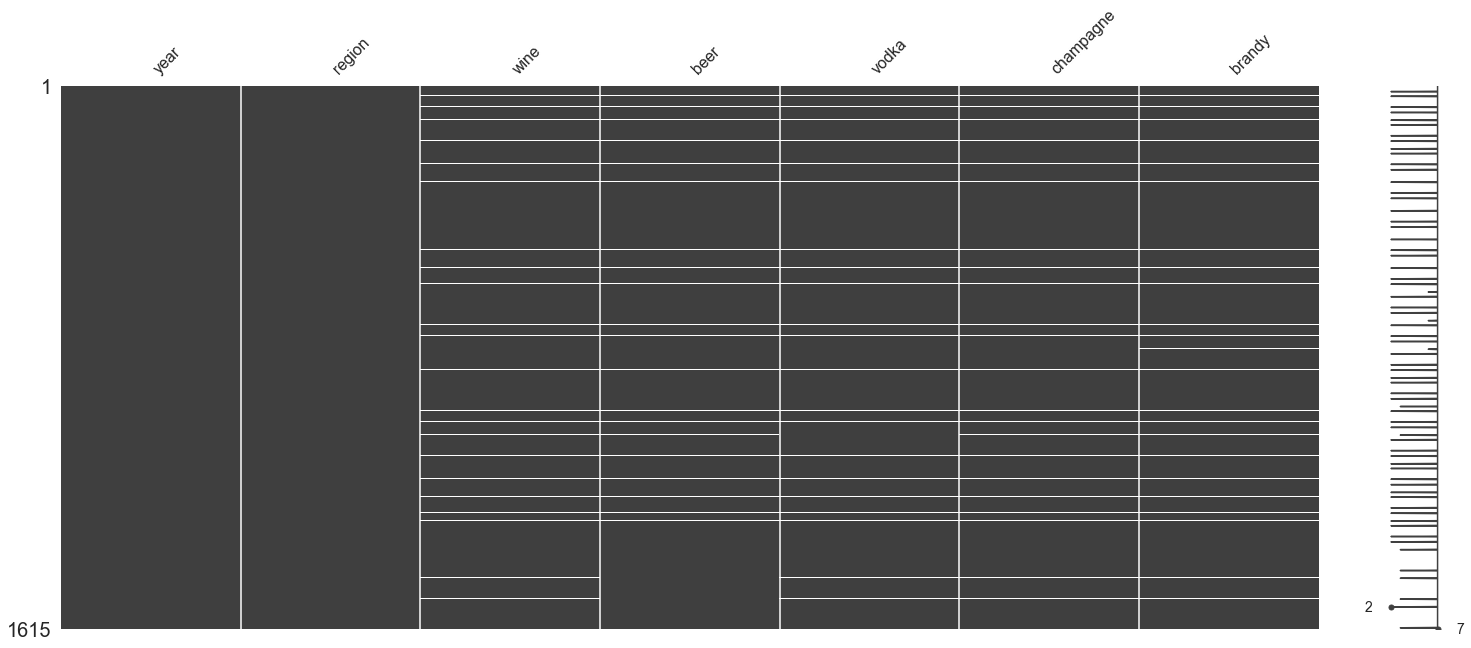

In [ ]:
# рассмотрим пропущенные значения в датасете
data.isna().sum()
msno.matrix(data)
plt.show()

In [ ]:
# посчитаем количество пропущенных значений во всем датасете
data.isnull().T.any().T.sum()

66

Всего строк с NaN значениями 66

Проверка на пропущенные значения показала, что по интересуемой нас категории напитков (водка) много пропущенных значений

In [ ]:
# сгруппируем по категориям данные
data_sorted = data.sort_values(['region', 'year'])
data_na = data_sorted[data_sorted['vodka'].isna()]
print(data_na.groupby('region')['region'].unique())
data_na

region
Chechen Republic                [Chechen Republic]
Republic of Crimea            [Republic of Crimea]
Republic of Ingushetia    [Republic of Ingushetia]
Sevastopol                            [Sevastopol]
Name: region, dtype: object


,year,region,wine,beer,vodka,champagne,brandy
79,1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN
164,1999,Chechen Republic,NaN,NaN,NaN,NaN,NaN
249,2000,Chechen Republic,NaN,NaN,NaN,NaN,NaN
334,2001,Chechen Republic,NaN,NaN,NaN,NaN,NaN
419,2002,Chechen Republic,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
998,2009,Sevastopol,NaN,NaN,NaN,NaN,NaN
1083,2010,Sevastopol,NaN,NaN,NaN,NaN,NaN
1168,2011,Sevastopol,NaN,NaN,NaN,NaN,NaN
1253,2012,Sevastopol,NaN,NaN,NaN,NaN,NaN


Построим матрицу по распределению по годам и регионам отсутствующих значений (NaN):

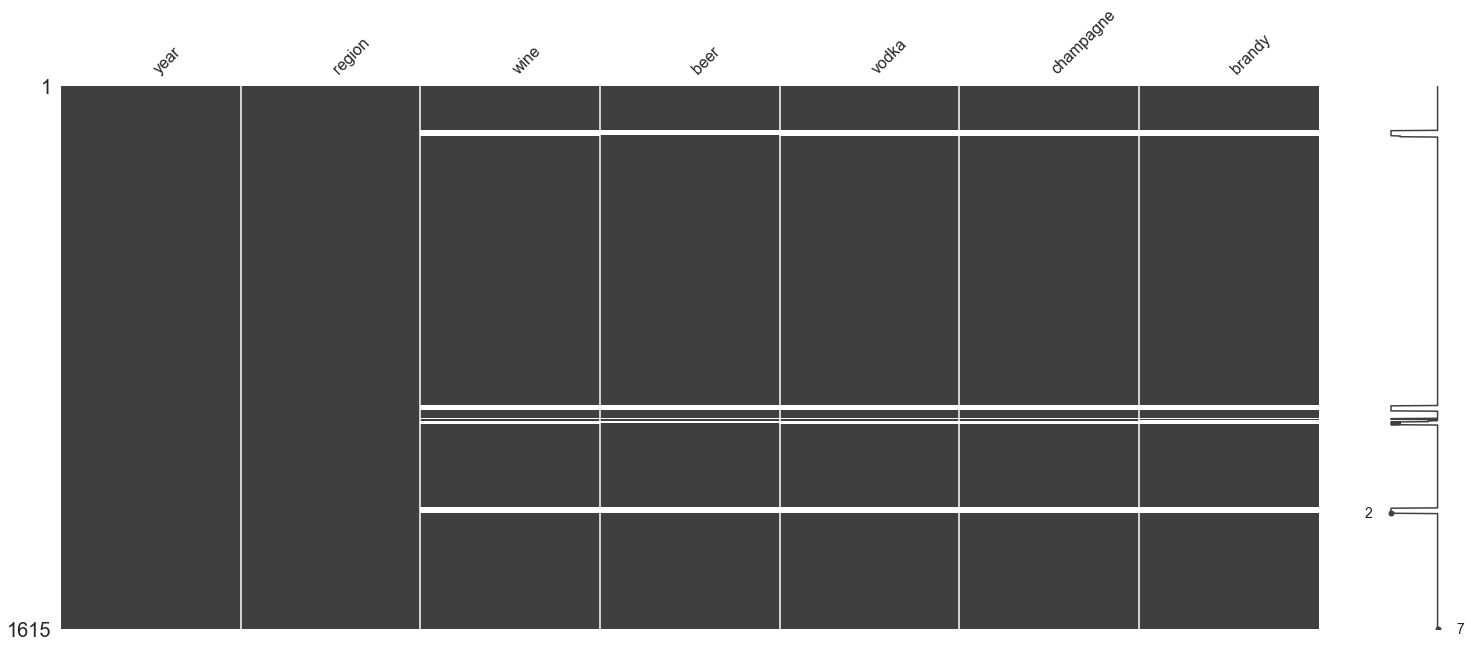

In [ ]:
msno.matrix(data.sort_values(['region', 'year']))
plt.show()

Проверим последние 5 лет на пропущенные значения, чтобы понять, случайные ли это пропуски или систематические:

In [ ]:
data_last_years = data
data_last_years = data_last_years[(data_last_years['year'] >= 2010) & (data_last_years['year'] <= 2016)]
data_last_years[data_last_years['vodka'].isna()]

,year,region,wine,beer,vodka,champagne,brandy
1051,2010,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
1083,2010,Sevastopol,NaN,NaN,NaN,NaN,NaN
1099,2010,Chechen Republic,NaN,NaN,NaN,NaN,NaN
1122,2011,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
1136,2011,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
1168,2011,Sevastopol,NaN,NaN,NaN,NaN,NaN
1184,2011,Chechen Republic,NaN,NaN,NaN,NaN,NaN
1207,2012,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
1221,2012,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
1253,2012,Sevastopol,NaN,NaN,NaN,NaN,NaN


По региону и году большинство NaN значений в данных по Чеченской Республике, Республкие Ингушетиb, Севастополю, Крымской Республике.

Уберем Чеченскую Республику и Республику Ингушетию:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 1020 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       581 non-null    int64  
 1   region     581 non-null    object 
 2   wine       573 non-null    float64
 3   beer       573 non-null    float64
 4   vodka      573 non-null    float64
 5   champagne  573 non-null    float64
 6   brandy     573 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 36.3+ KB
None


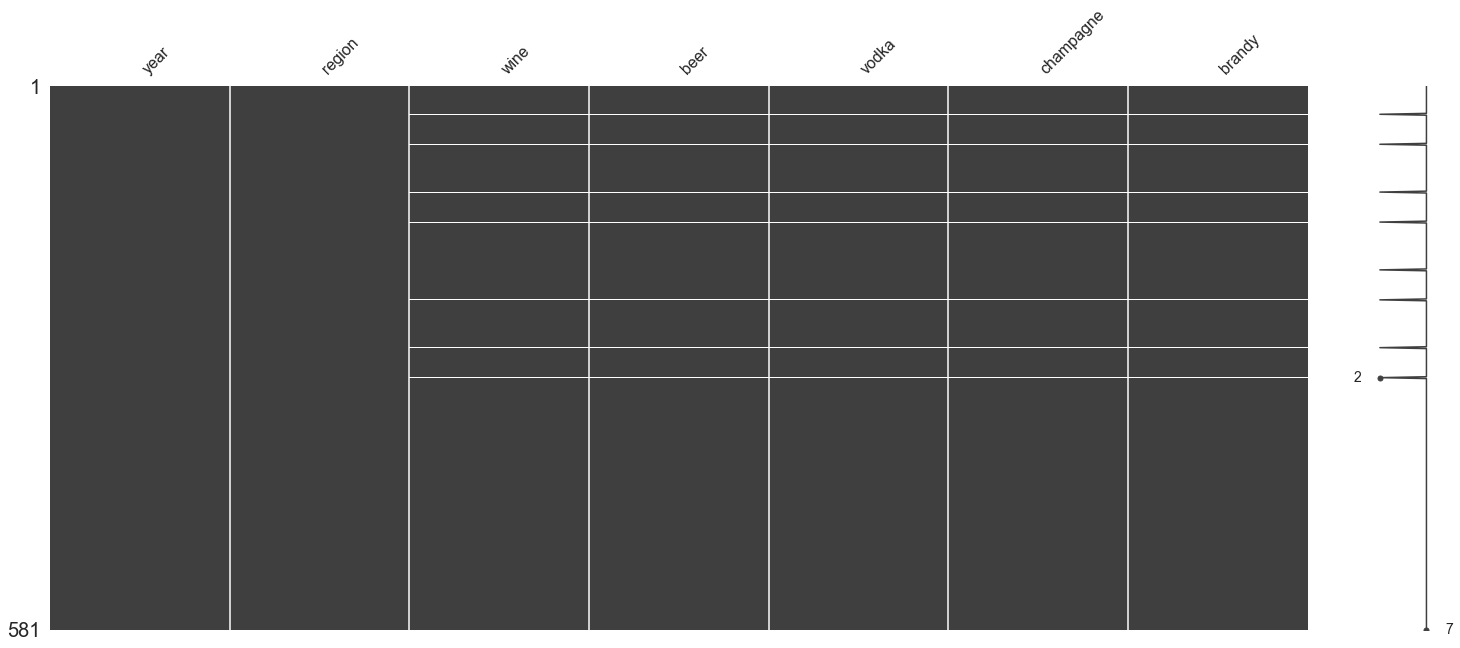

In [ ]:
data_last_years = data_last_years[(data_last_years['region'] != 'Chechen Republic') & (data_last_years['region'] != 'Republic of Ingushetia')]
print(data_last_years.info())
msno.matrix(data_last_years)
plt.show()

При удалении по всему датасету данных по Чеченской Республике и Республике Ингушетия, получаем:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1577 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1577 non-null   int64  
 1   region     1577 non-null   object 
 2   wine       1545 non-null   float64
 3   beer       1545 non-null   float64
 4   vodka      1545 non-null   float64
 5   champagne  1545 non-null   float64
 6   brandy     1545 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 98.6+ KB
None


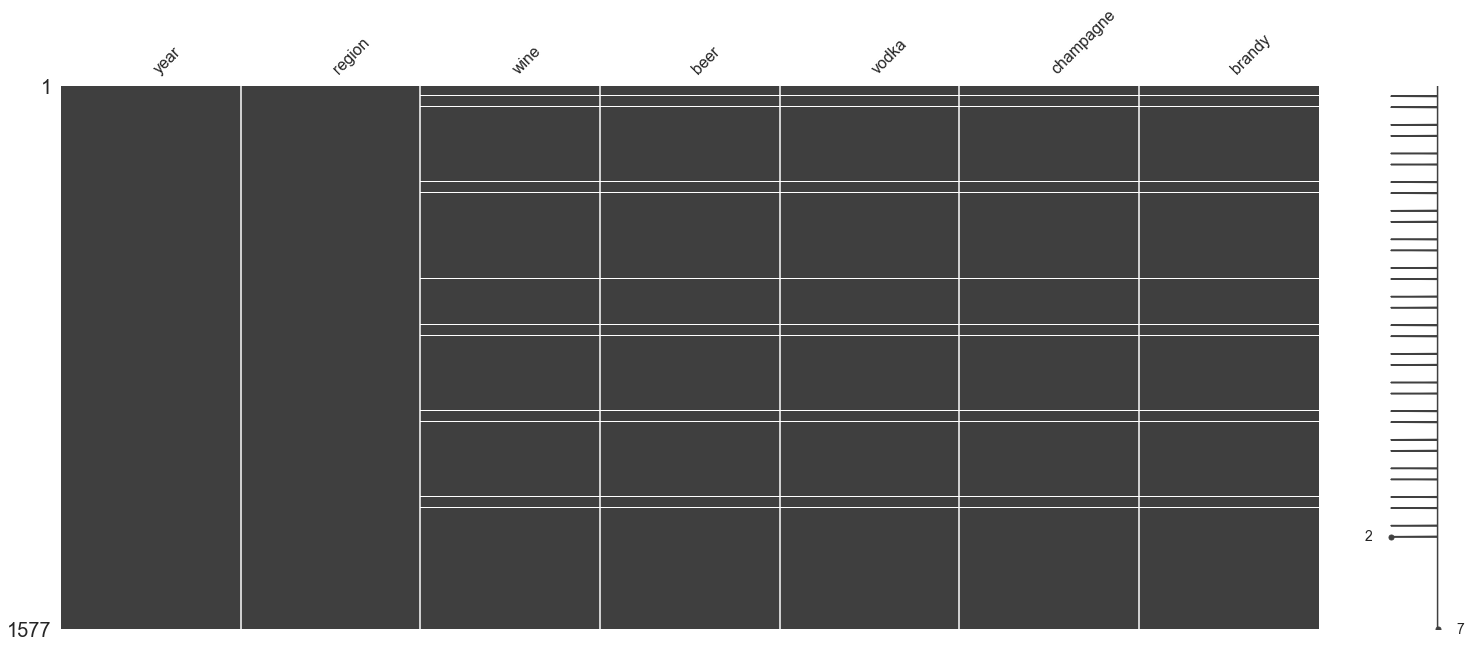

In [ ]:
data_all_years = data[(data['region'] != 'Chechen Republic') & (data['region'] != 'Republic of Ingushetia')]
print(data_all_years.info())
msno.matrix(data_all_years)
plt.show()

In [ ]:
df_Na = data_all_years[data_all_years['vodka'].isna()]
df_Na

,year,region,wine,beer,vodka,champagne,brandy
31,1998,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
63,1998,Sevastopol,NaN,NaN,NaN,NaN,NaN
116,1999,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
148,1999,Sevastopol,NaN,NaN,NaN,NaN,NaN
201,2000,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
233,2000,Sevastopol,NaN,NaN,NaN,NaN,NaN
286,2001,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
318,2001,Sevastopol,NaN,NaN,NaN,NaN,NaN
371,2002,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
403,2002,Sevastopol,NaN,NaN,NaN,NaN,NaN


Видим, что данные по Севастополю и Республике Крым отсутствуют по всему датасету по годам, кроме последних 3-х. Логичнее будет строки по данным регионам удалить.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1539 non-null   int64  
 1   region     1539 non-null   object 
 2   wine       1539 non-null   float64
 3   beer       1539 non-null   float64
 4   vodka      1539 non-null   float64
 5   champagne  1539 non-null   float64
 6   brandy     1539 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.2+ KB
None


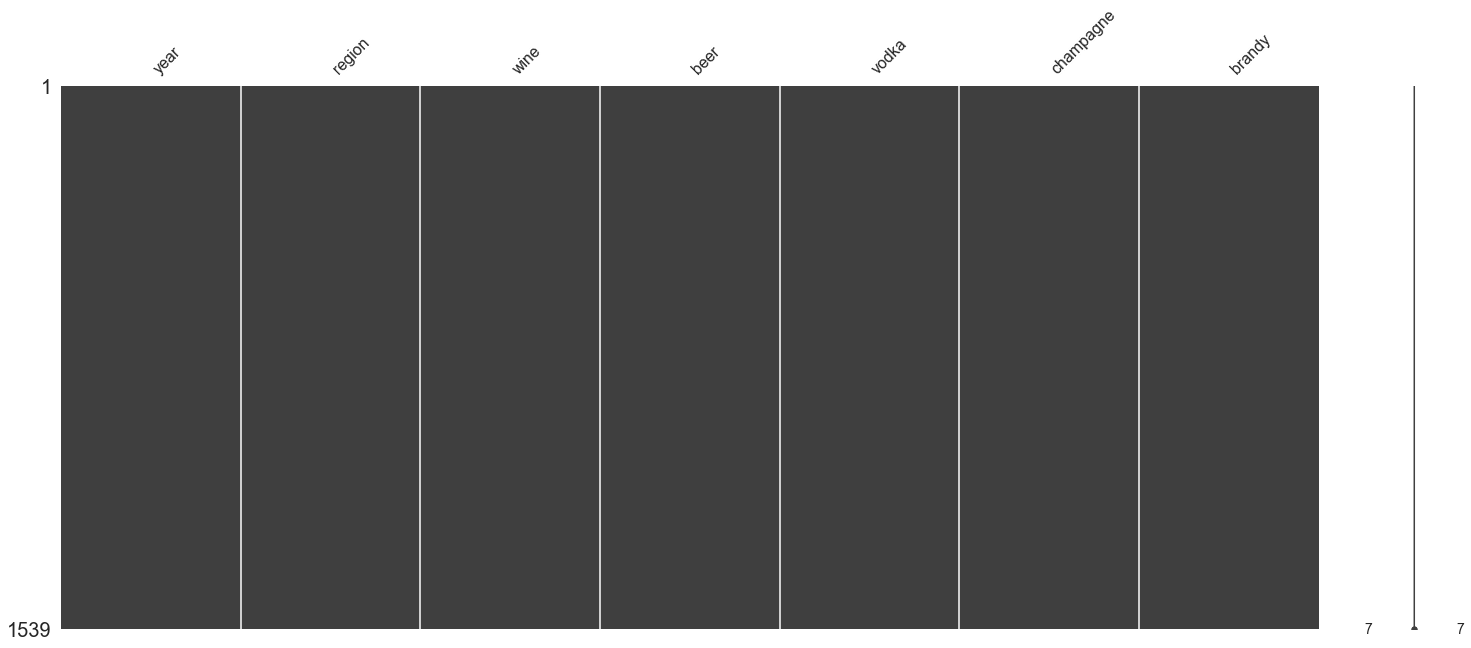

In [ ]:
data_none_Na = data_all_years[(data_all_years['region'] != 'Sevastopol') & (data_all_years['region'] != 'Republic of Crimea')]
print(data_none_Na.info())
msno.matrix(data_none_Na)
plt.show()

In [ ]:
# выведем наши очищенные данные
data_none_Na

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


Пропущенных данных теперь нет, датасет теперь состоит из 1539 записей.

In [ ]:
# посмотрим признаки нашего датасета
data_none_Na.columns

Index(['year', 'region', 'wine', 'beer', 'vodka', 'champagne', 'brandy'], dtype='object')

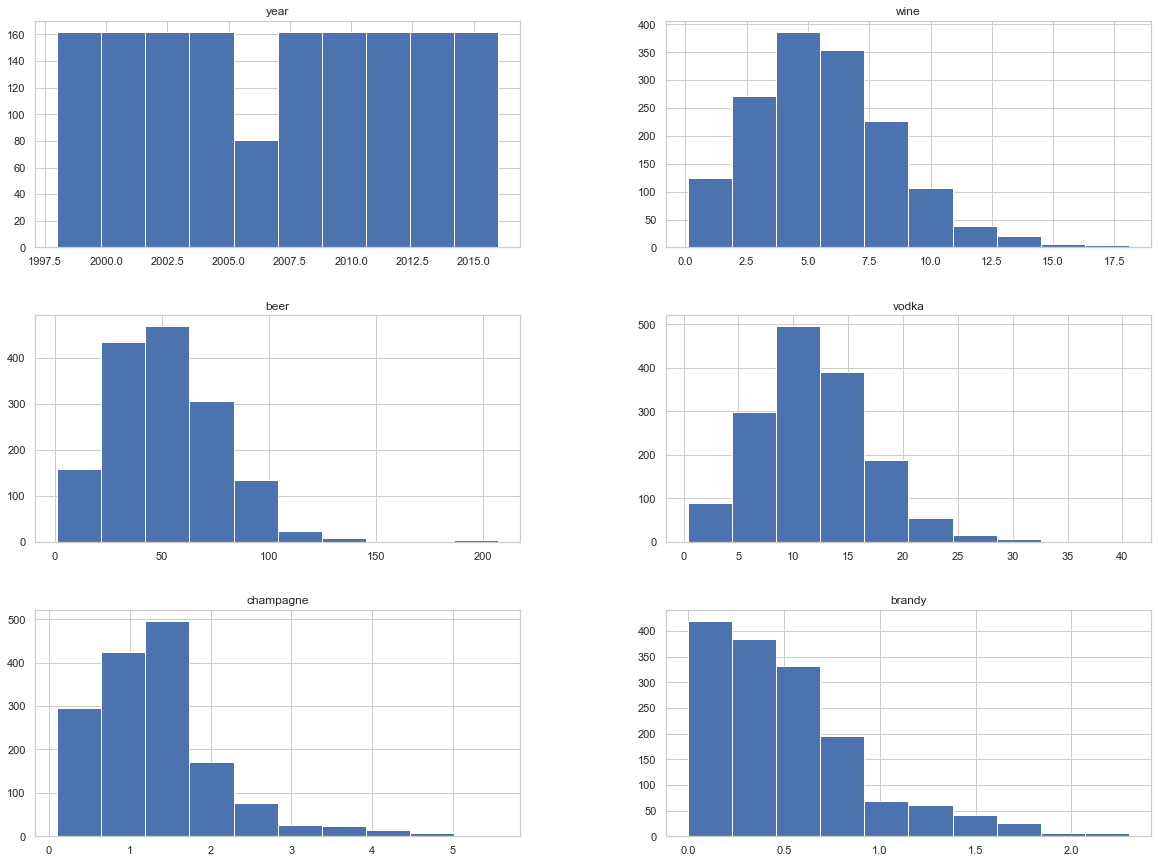

In [ ]:
# построим распределение по признакам
gist=data_none_Na.hist(figsize=(20,15))
plt.show()

Анализируя информацию, видим, что часть данных с 2005 по 2007 гг. отсутствует (по данным столбца "year").

In [ ]:
mean_cons_per_year = data_none_Na.groupby('year', as_index=False).agg({'vodka':'median', 'wine':'median', 'beer':'median', 'champagne':'median', 'brandy':'median'})

Посмотрим информацию по потреблению алкоголя (л/год) в целом по РФ:

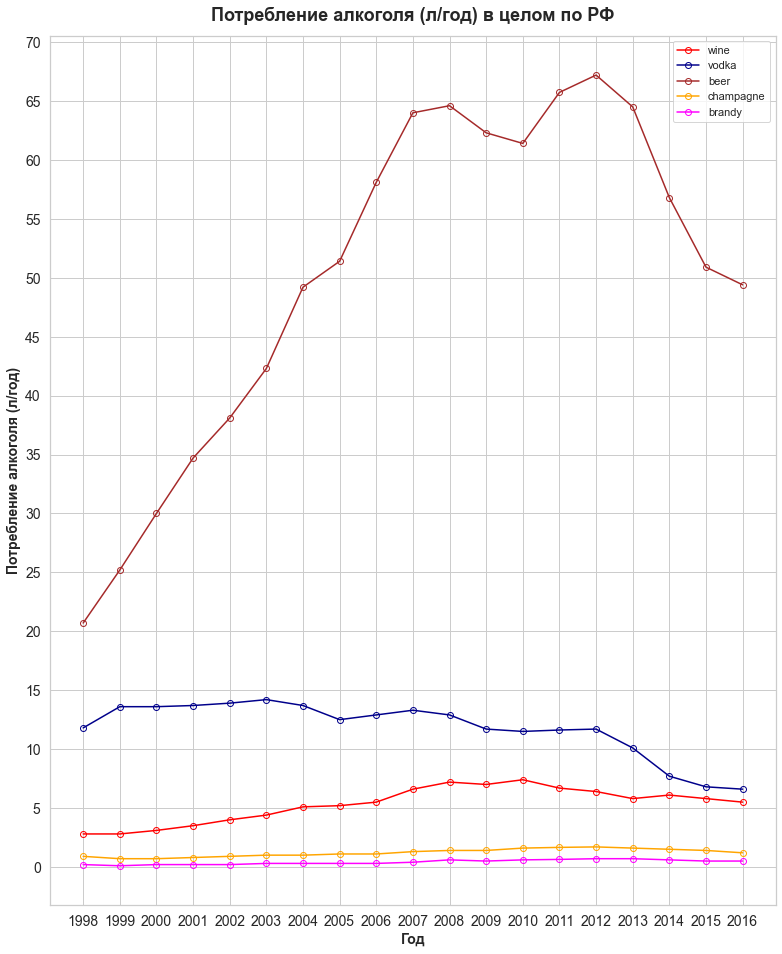

In [ ]:
plt.rcParams['figure.figsize'] = [13, 16]

plt.xlabel('Год')
plt.ylabel('Потребление алкоголя в л/год в среднем по регионам')

plt.plot(mean_cons_per_year.year, mean_cons_per_year.wine, marker='o', markerfacecolor = "None", color='red', label='wine')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.vodka, marker='o', markerfacecolor = "None", color='darkblue', label='vodka')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.beer, marker='o', markerfacecolor = "None", color='brown', label='beer')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.champagne, marker='o', markerfacecolor = "None", color='orange', label='champagne')
plt.plot(mean_cons_per_year.year, mean_cons_per_year.brandy, marker='o', markerfacecolor = "None", color='magenta', label = 'brandy')

plt.title('Потребление алкоголя (л/год) в целом по РФ', fontsize=18, fontweight="bold", y=1.01)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Потребление алкоголя (л/год)", fontsize=14, fontweight="bold")
plt.tick_params(labelsize=14)
plt.xticks([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

plt.legend()

Видим, что больше всего из потребляемого алкоголя приходится на пиво - не сильно градусного и достаточно недорого, что закономерно для условий достатка среднестатистического россиянина. Но нас интересует более градусный напиток - водка.

Для всех регионов потребление водки, литров на душу населения в разрезе по годам:

In [ ]:
data_pivot = data_none_Na.pivot(index='region', columns='year', values='vodka')
data_pivot

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
region,,,,,,,,,,,,,,,,,,,
Altai Krai,11.3,11.5,9.9,12.0,11.4,11.5,14.2,10.0,9.7,6.9,8.2,8.5,9.8,10.75,11.0,8.7,5.5,4.5,4.5
Altai Republic,9.0,7.9,9.8,10.6,10.1,10.6,11.2,11.7,9.5,10.5,10.5,10.4,9.9,10.19,9.9,9.1,8.8,7.7,6.6
Amur Oblast,17.3,16.2,15.8,17.6,17.9,17.4,18.1,20.8,19.3,17.3,13.8,10.5,11.6,12.02,13.3,10.2,8.3,6.7,6.0
Arkhangelsk Oblast,11.7,14.9,19.2,23.5,29.5,31.9,18.5,17.6,16.9,15.6,16.6,15.9,16.2,16.64,14.4,14.4,12.8,11.8,12.2
Astrakhan Oblast,9.5,10.2,10.0,11.9,12.0,12.4,12.9,11.0,9.6,9.6,9.1,8.7,9.2,8.74,9.5,7.3,5.8,4.7,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vologda Oblast,19.3,17.4,19.2,23.0,22.2,24.6,26.7,21.9,17.5,16.2,17.5,15.2,12.9,15.44,14.9,12.9,11.1,9.3,9.9
Voronezh Oblast,14.2,11.7,9.1,9.2,10.5,10.8,12.6,13.8,11.1,11.9,12.9,13.0,9.4,8.41,8.5,8.0,4.9,4.1,4.3
Yamalo-Nenets Autonomous Okrug,11.5,13.5,18.0,20.5,23.3,18.6,18.6,18.9,19.8,15.2,15.0,13.2,12.8,14.07,14.1,12.7,10.2,8.6,8.2


C:\Users\siraevagm\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siraevagm\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\siraevagm\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\siraevagm\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


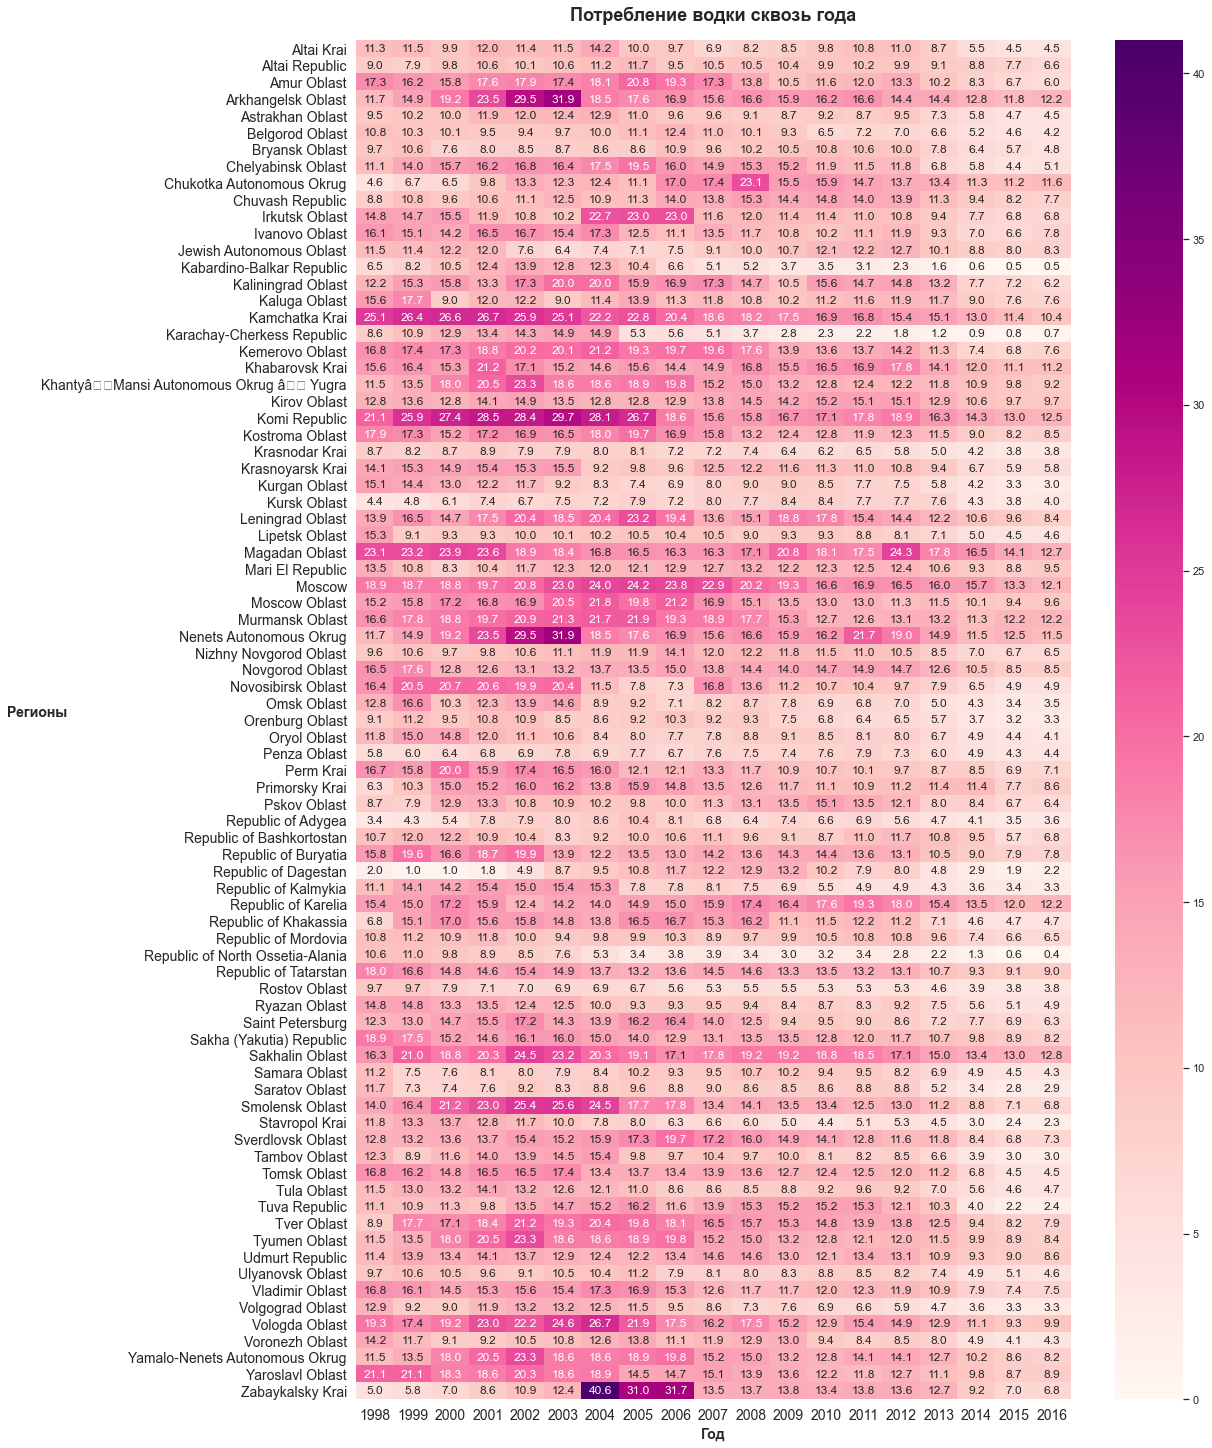

In [ ]:
plt.subplots(figsize=(16, 25))
ax = sns.heatmap(data_pivot, annot=True, fmt='.1f', vmin=0.0, vmax=41.0, cmap='RdPu')
plt.title('Потребление водки сквозь года', fontsize=18, fontweight="bold", y=1.01)
plt.xlabel("Год", fontsize=14, fontweight="bold")
plt.ylabel("Регионы", fontsize=14, fontweight="bold", rotation="horizontal")
plt.tick_params(labelsize=14)
plt.show()

Как видим, потребление водки, рассмотренное  в период с 1998 по 2016 год, по всем регионам в последние годы имеет тенденцию к уменьшению.

Рассматривая историю РФ за этот период, выделялись два кризиса - 2008 года и 2014 года. По данным потребления водки в эти года, влияния нет.

Выделим топ-10 регионов по потреблению водки с 1998 по 2016гг на душу населения:

In [ ]:
df = data_none_Na
df_transformed=pd.DataFrame(columns=['year','region','drink','consumption'])
for index,row in df.iterrows():
    s = pd.Series([row['year'], row['region'], 'wine', row['wine']],df_transformed.columns)
    s1 = pd.Series([row['year'], row['region'], 'beer', row['beer']],df_transformed.columns)
    s2 = pd.Series([row['year'], row['region'], 'vodka', row['vodka']],df_transformed.columns)
    s3 = pd.Series([row['year'], row['region'], 'champagne', row['champagne']],df_transformed.columns)
    s4 = pd.Series([row['year'], row['region'], 'brandy', row['brandy']],df_transformed.columns)
    df_transformed= df_transformed.append([s,s1,s2,s3,s4],ignore_index=True)

Text(0.5, 0.5, 'Потребление, л/чел., в среднем')

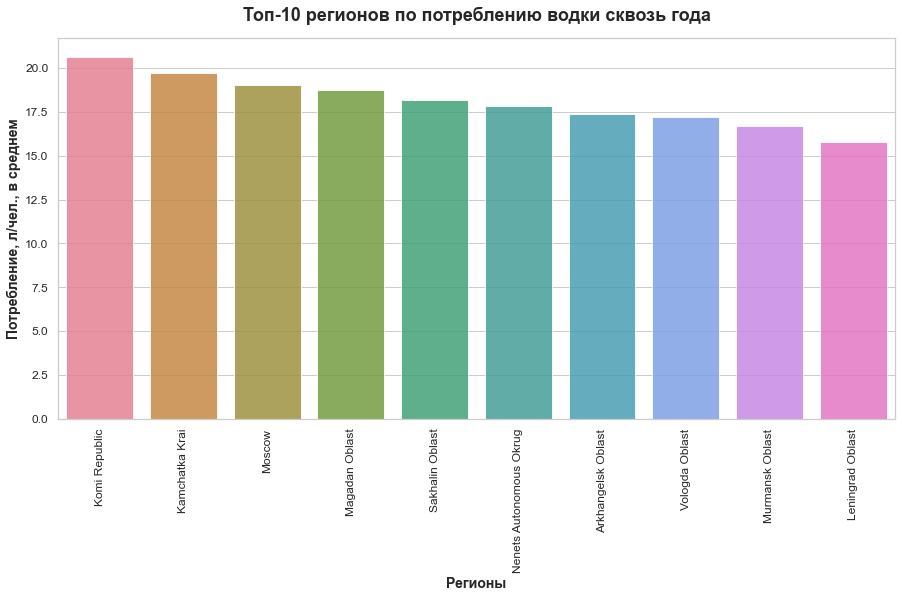

In [ ]:
top10_vodka_region=df_transformed[df_transformed['drink']=='vodka'].groupby('region').mean()
top10_vodka_region=top10_vodka_region.reset_index().sort_values(by='consumption',ascending=False)
plt.figure(figsize=(15,7))
g=sns.barplot(data=top10_vodka_region[:10],y='consumption',x='region', palette="husl", alpha=0.85)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.tick_params(labelsize=12)
plt.title('Топ-10 регионов по потреблению водки сквозь года', fontsize=18, fontweight="bold", y=1.03)
plt.xlabel("Регионы", fontsize=14, fontweight="bold")
plt.ylabel("Потребление, л/чел., в среднем", fontsize=14, fontweight="bold", x=0.5)

Отличные новости - Республика Татарстан не в топе регионов по потреблению водки. Думаю, можно гордиться. Скорее всего это связано с главной исповедуемой религией республики - исламом.

In [ ]:
f = data_none_Na[["year", "region", "vodka", "beer", "wine", "champagne", "brandy"]].groupby(['year', "region"]).mean().unstack(level=0)
f

vodka                                      \
year                            1998  1999  2000  2001  2002  2003  2004   
region                                                                     
Altai Krai                      11.3  11.5   9.9  12.0  11.4  11.5  14.2   
Altai Republic                   9.0   7.9   9.8  10.6  10.1  10.6  11.2   
Amur Oblast                     17.3  16.2  15.8  17.6  17.9  17.4  18.1   
Arkhangelsk Oblast              11.7  14.9  19.2  23.5  29.5  31.9  18.5   
Astrakhan Oblast                 9.5  10.2  10.0  11.9  12.0  12.4  12.9   
...                              ...   ...   ...   ...   ...   ...   ...   
Vologda Oblast                  19.3  17.4  19.2  23.0  22.2  24.6  26.7   
Voronezh Oblast                 14.2  11.7   9.1   9.2  10.5  10.8  12.6   
Yamalo-Nenets Autonomous Okrug  11.5  13.5  18.0  20.5  23.3  18.6  18.6   
Yaroslavl Oblast                21.1  21.1  18.3  18.6  20.3  18.6  18.9   
Zabaykalsky Krai                 5.0   5.8   7.0   8.6  10.9  12.4  40.6   

                                                  ... brandy                 \
year                            2005  2006  2007  ...   2007 2008 2009 2010   
region                                            ...                         
Altai Krai                      10.0   9.7   6.9  ...    0.2  0.3  0.3  0.4   
Altai Republic                  11.7   9.5  10.5  ...    0.3  0.4  0.4  0.4   
Amur Oblast                     20.8  19.3  17.3  ...    0.3  0.5  0.5  0.6   
Arkhangelsk Oblast              17.6  16.9  15.6  ...    0.8  0.9  1.1  1.2   
Astrakhan Oblast                11.0   9.6   9.6  ...    0.3  0.4  0.4  0.5   
...                              ...   ...   ...  ...    ...  ...  ...  ...   
Vologda Oblast                  21.9  17.5  16.2  ...    0.4  0.6  0.5  0.4   
Voronezh Oblast                 13.8  11.1  11.9  ...    0.5  0.6  0.6  0.5   
Yamalo-Nenets Autonomous Okrug  18.9  19.8  15.2  ...    1.1  1.1  1.3  1.3   
Yaroslavl Oblast                14.5  14.7  15.1  ...    0.6  0.7  0.7  0.8   
Zabaykalsky Krai                31.0  31.7  13.5  ...    0.2  0.3  0.4  0.4   

                                                               
year                            2011 2012 2013 2014 2015 2016  
region                                                         
Altai Krai                      0.40  0.4  0.4  0.3  0.3  0.3  
Altai Republic                  0.52  0.5  0.4  0.4  0.3  0.3  
Amur Oblast                     0.64  0.6  0.7  0.6  0.5  0.5  
Arkhangelsk Oblast              1.24  1.1  1.1  1.0  0.9  0.9  
Astrakhan Oblast                0.56  0.7  0.6  0.7  0.6  0.6  
...                              ...  ...  ...  ...  ...  ...  
Vologda Oblast                  0.64  0.8  0.7  0.6  0.6  0.6  
Voronezh Oblast                 0.44  0.6  0.5  0.6  0.5  0.6  
Yamalo-Nenets Autonomous Okrug  1.78  1.8  1.7  1.5  1.3  1.3  
Yaroslavl Oblast                0.85  1.1  1.0  1.0  0.9  1.0  
Zabaykalsky Krai                0.45  0.4  0.4  0.3  0.3  0.3  

[81 rows x 95 columns]

In [ ]:
data_RT = data_pivot.loc["Republic of Tatarstan"]
data_RT

year
1998    18.00
1999    16.60
2000    14.80
2001    14.60
2002    15.40
2003    14.90
2004    13.70
2005    13.20
2006    13.60
2007    14.50
2008    14.60
2009    13.30
2010    13.50
2011    13.19
2012    13.10
2013    10.70
2014     9.30
2015     9.10
2016     9.00
Name: Republic of Tatarstan, dtype: float64

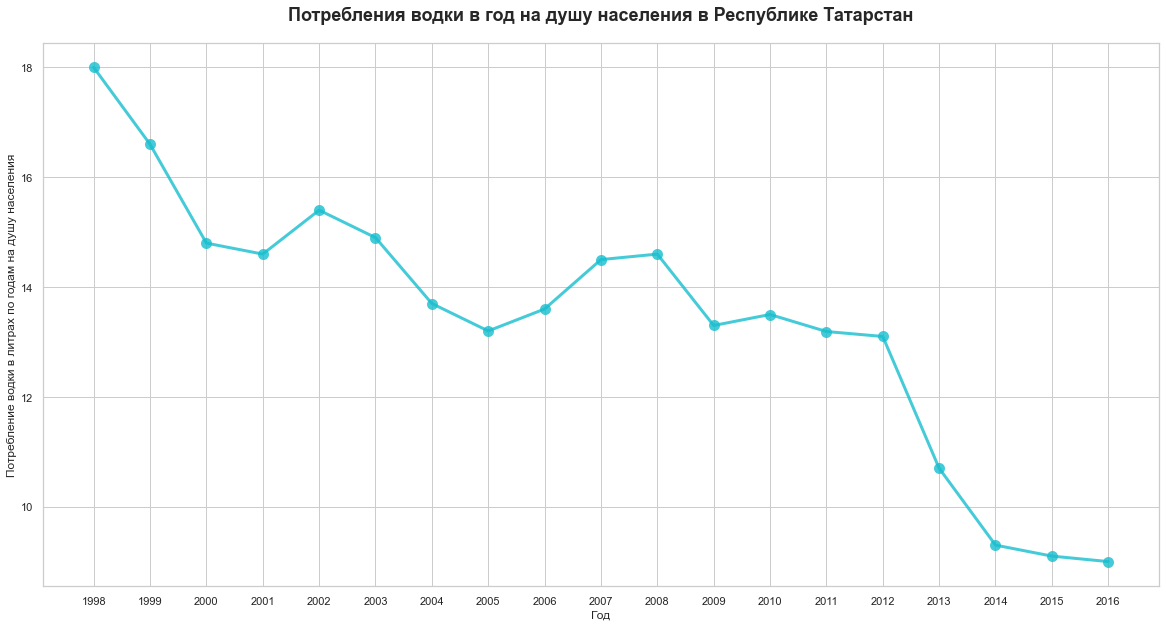

In [ ]:
plt.figure(figsize=(20,10))
data_RT.plot(linewidth=3, color="#17becf", marker="o", markerfacecolor = "None", markeredgecolor="#17becf", markeredgewidth=5, alpha = 0.8)
plt.xlabel("Год")
plt.xticks([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
plt.ylabel("Потребление водки в литрах по годам на душу населения")
plt.title('Потребления водки в год на душу населения в Республике Татарстан', fontsize=18, fontweight="bold", y=1.03)
plt.show()

Судя по получившемуся графику, в среднем, количество потребления водки в год на душу населения имеет ниспадающий (убывающий) характер для Республики Татарстан (РТ)

В 2002 году в РТ была принята Конституция Республики Татарстан, в 2008 экономический кризис - возможно всплески потребления водки можно объяснить данными событиями. Но это чисто моё предположение.

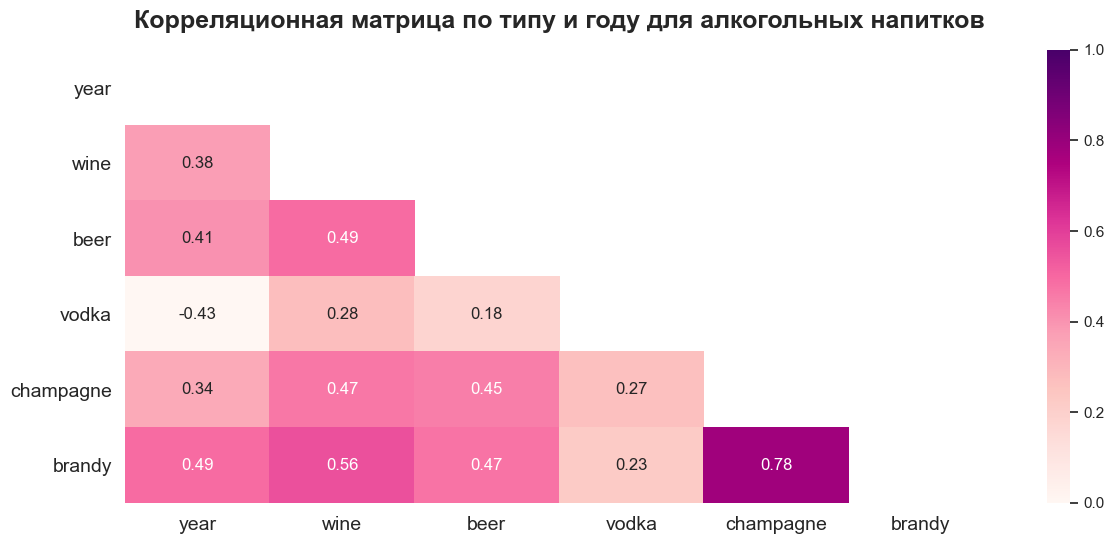

In [ ]:
plt.figure(figsize=(14,6), dpi=100)
matrix = np.triu(df.corr())
sns.heatmap(data_none_Na.corr(), annot=True, mask=matrix, cmap="RdPu", vmin=0.0, vmax=1.0)
plt.title('Корреляционная матрица по типу и году для алкогольных напитков', fontsize=18, fontweight="bold", y=1.03)
plt.tick_params(labelsize=14)

По корреляционной матрице видим, что для водки корреляция с другими типами алкогольных напитков достаточно слабая.

In [ ]:
data_none_Na

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


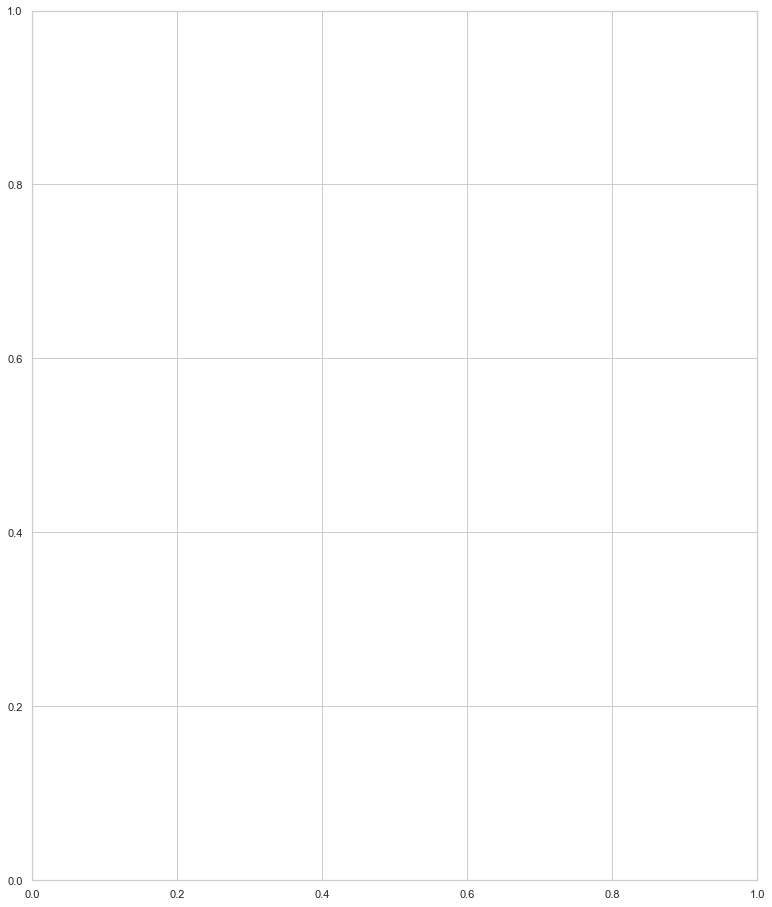

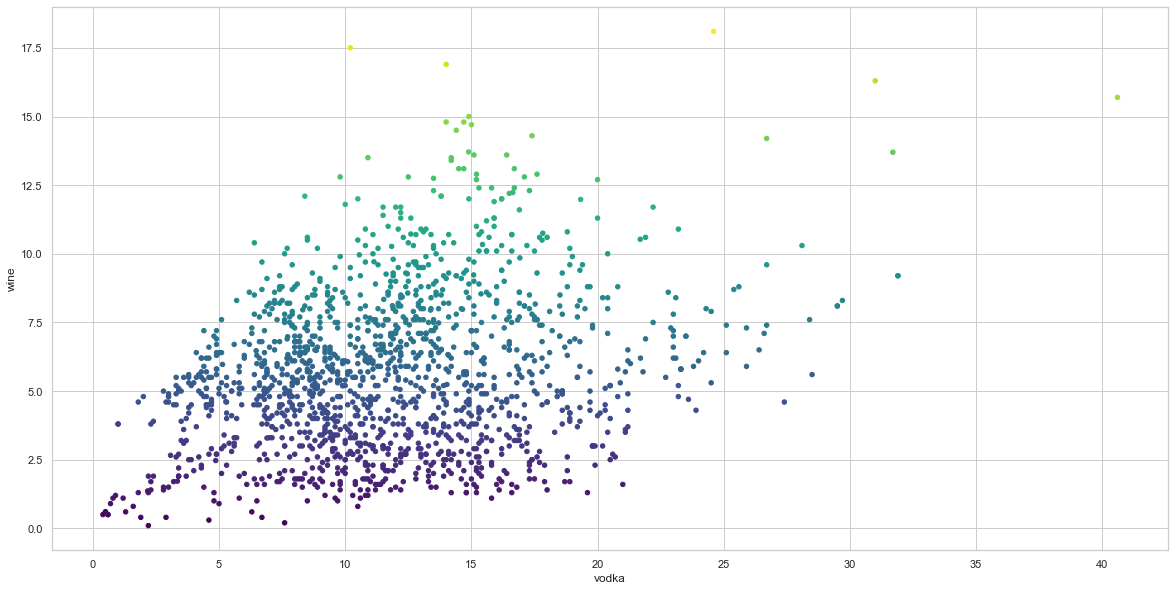

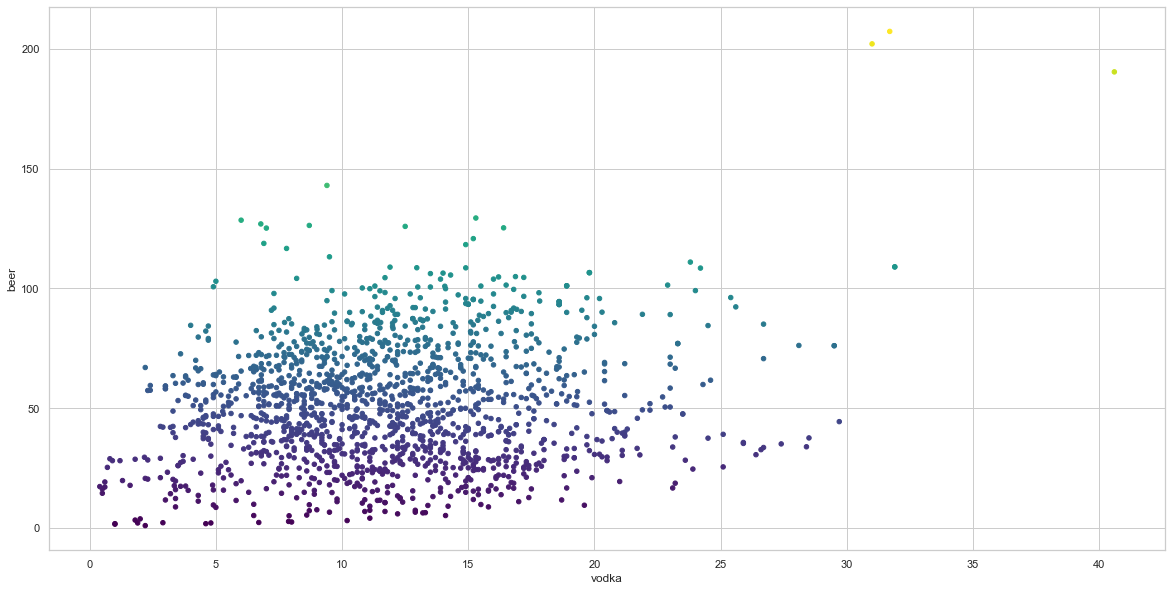

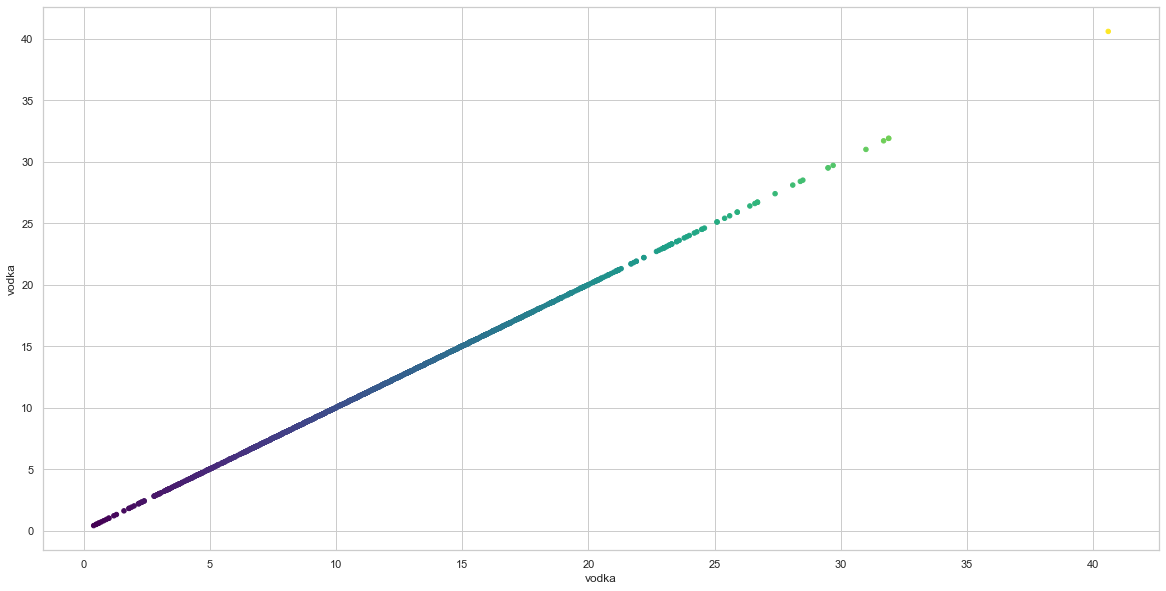

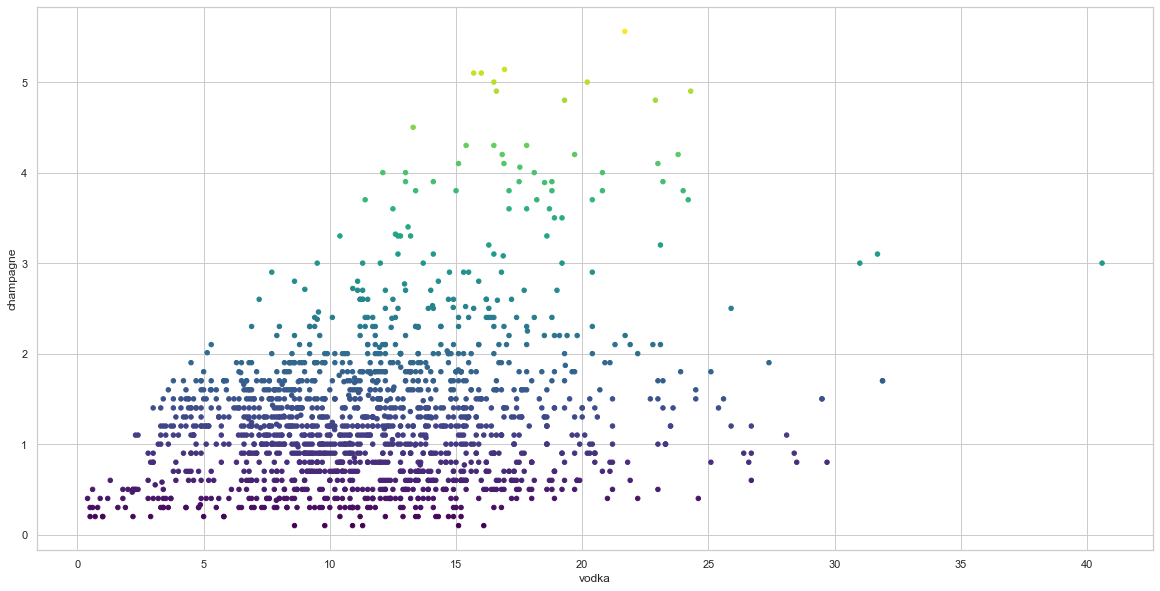

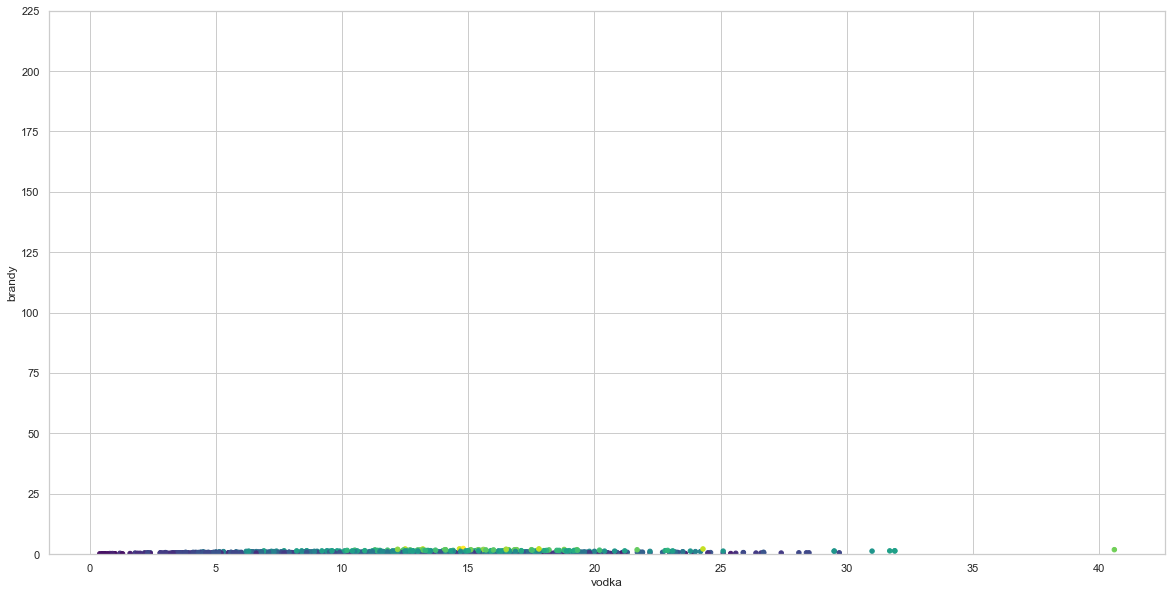

In [ ]:
ax = plt.gca()
columns = data_none_Na.columns
for col in columns[2:]:
    data_none_Na.plot.scatter(x=columns[4], y=col, c=col, colormap='viridis',colorbar=False,
        figsize=(20,10))
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225])
plt.show()

Построив scatterplot для визуализации разброса значений водки против алкогольных напитков, мы види. что корреляции почти нет.

C:\Users\siraevagm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


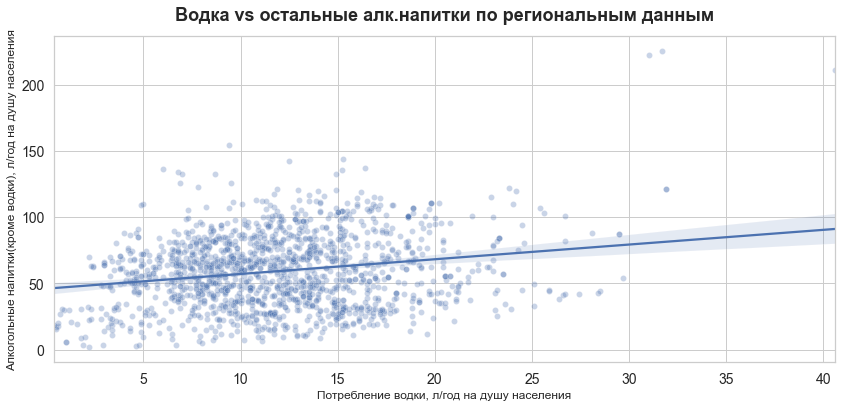

In [ ]:
data_none_Na.loc[:,'no_vodka'] = data_none_Na.loc[:,'wine'] + data_none_Na.loc[:,'beer'] + data_none_Na.loc[:,'champagne'] + data_none_Na.loc[:,'brandy']

plt.figure(figsize=(14,6))
_ =sns.scatterplot(x=data_none_Na['vodka'],\
                y=data_none_Na['no_vodka'], \
                alpha = 0.3)
_ = sns.regplot(x=data_none_Na['vodka'], y=data_none_Na['no_vodka'], scatter=False)
plt.title('Водка vs остальные алк.напитки по региональным данным', fontsize=18, fontweight="bold", y=1.03)
plt.xlabel('Потребление водки, л/год на душу населения')
plt.ylabel('Алкогольные напитки(кроме водки), л/год на душу населения')
plt.tick_params(labelsize=14)

Мы построили единый scatterplot "Водка vs остальные алк.напитки по региональным данным"

# Вывод:
- мы рассмотрели потребление водки по регионам в разрезе 1998-2016 года - увидели тенденцию к снижению потребления с переломным моментом примерно в 2010 году, скорее всего россияне отказываются от водки в пользу других алкогольных продуктов.
- корреляция потребления водки с потреблением других крепких напитков есть, просто она слабовыраженная.
-  в среднем, количество потребления водки в год на душу населения имеет ниспадающий (убывающий) характер для Республики Татарстан (РТ).
- больше всего из потребляемого алкоголя приходится на пиво - не сильно градусного и достаточно недорого, что закономерно для условий достатка среднестатистического россиянина.

Из чего можно сделать вывод, что наша гипотеза о том. что самый популярный крепкий напиток в России это водка, ошибочен.

Спасибо за внимание!